In [3]:
import sys
print(sys.executable)


/home/pyodide/this.program


In [5]:
%pip install seaborn


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
df=pd.read_csv('UpdatedResumeDataSet.csv')

In [13]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [15]:
df.shape

(962, 2)

In [18]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [20]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

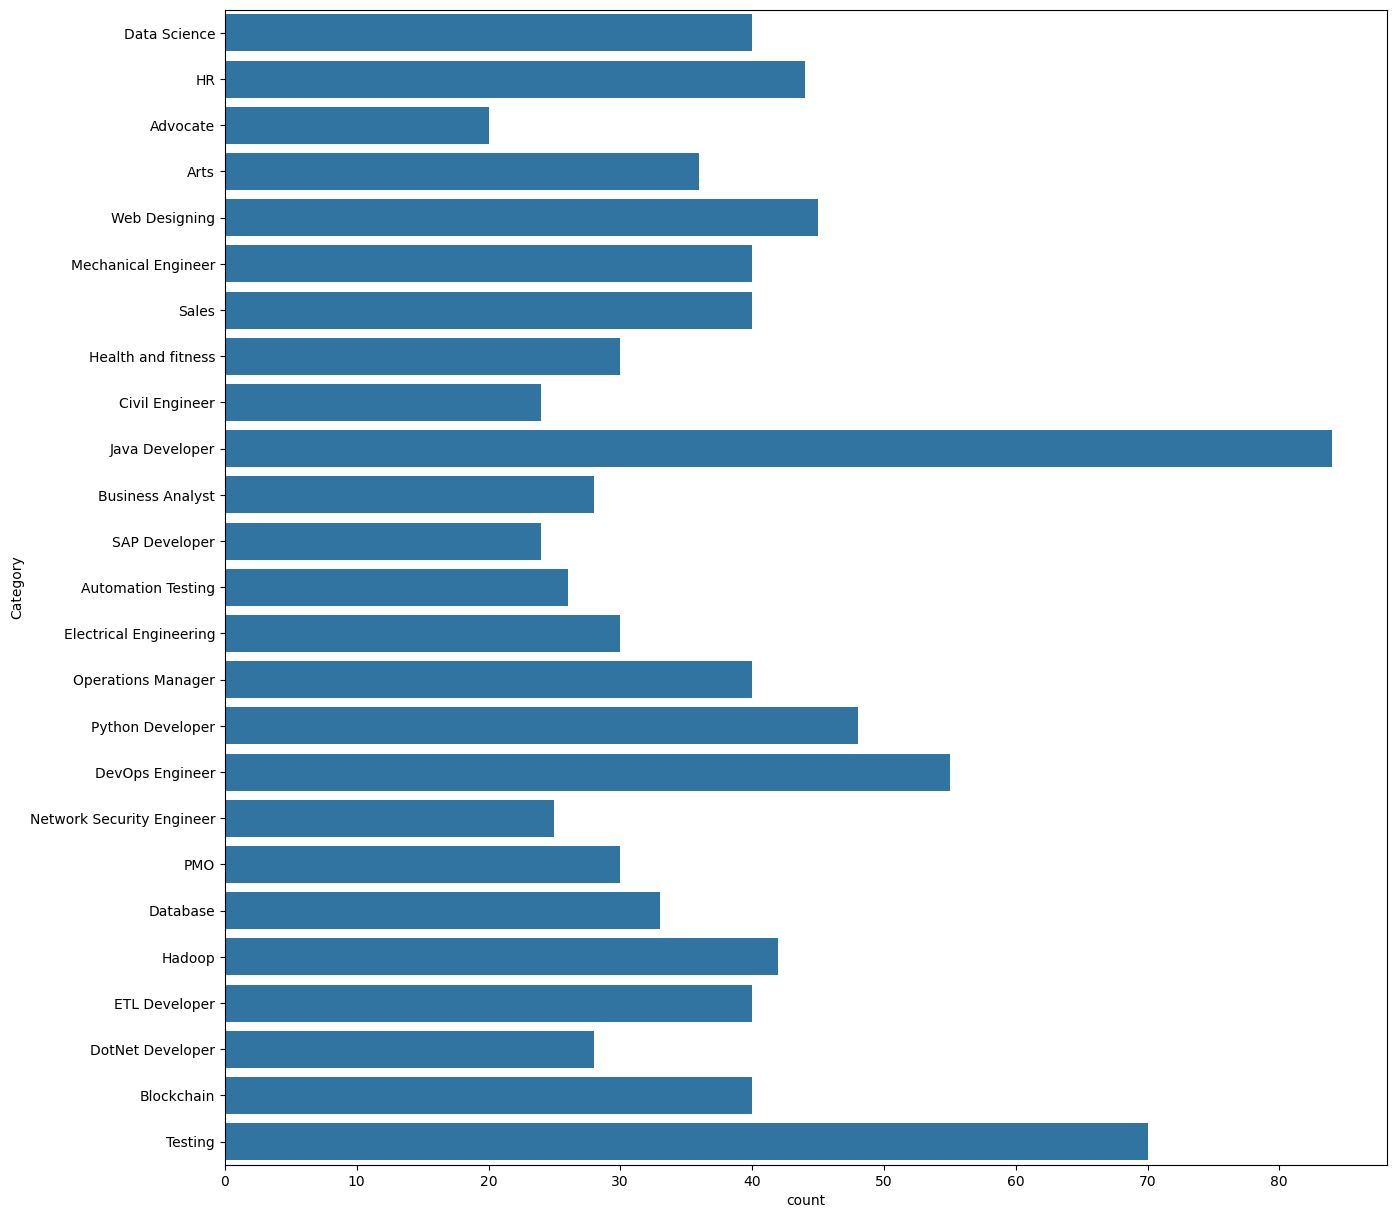

In [32]:
plt.figure(figsize=(15,15))
sns.countplot(df['Category'])
plt.show()

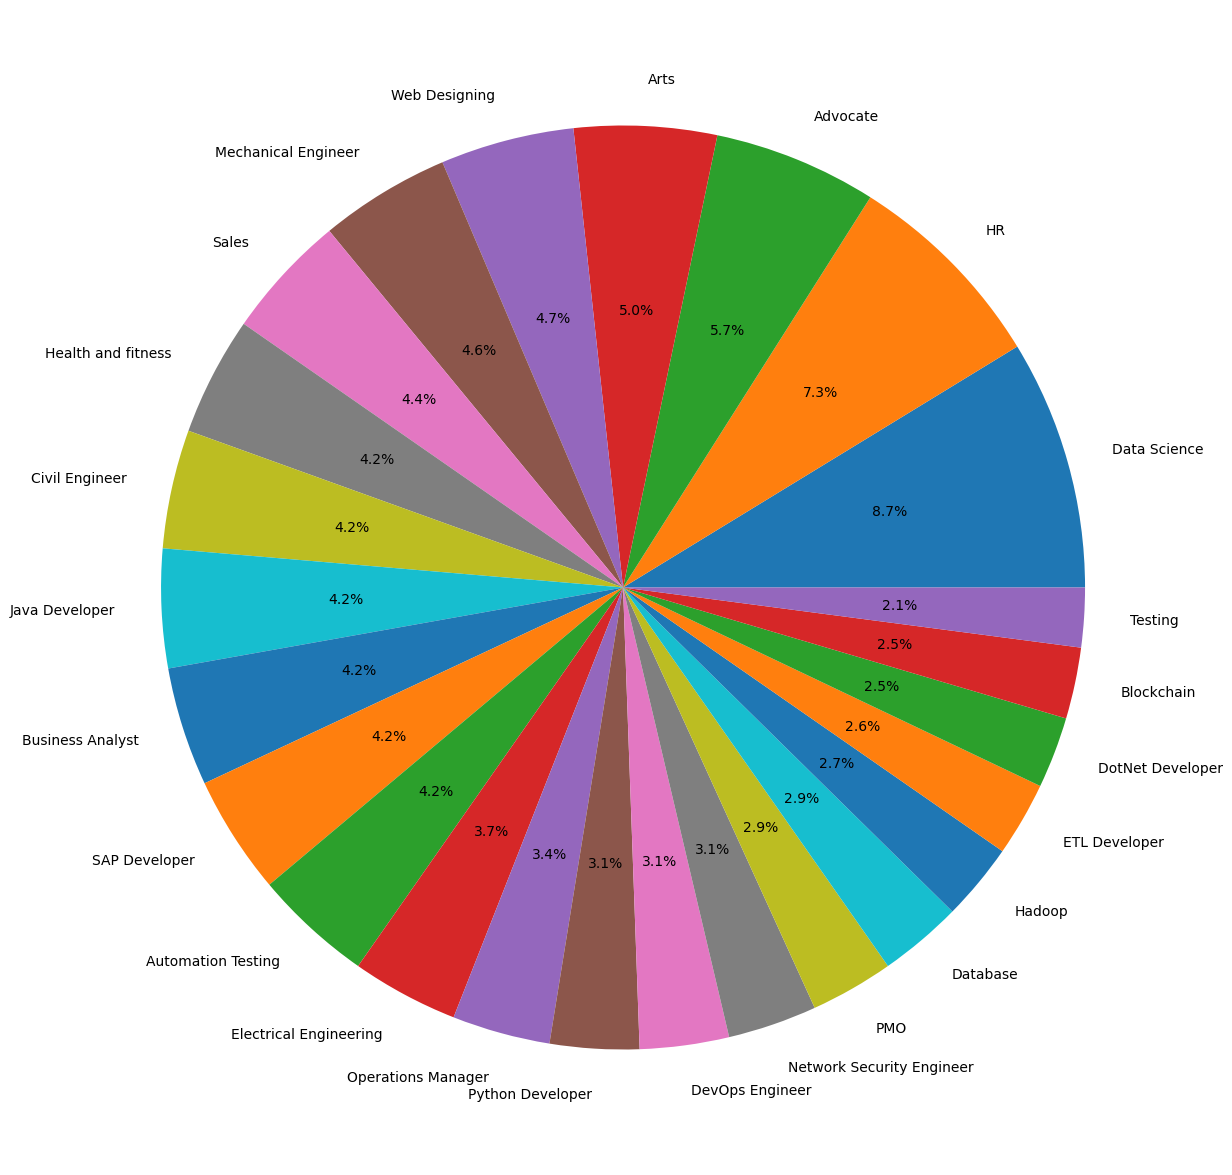

In [37]:
plt.figure(figsize=(15,15))
counts=df['Category'].value_counts()
labels=df['Category'].unique()
plt.pie(counts,labels=labels,autopct='%1.1f%%')
plt.show()

Exploring Resume

In [38]:
df['Category'][0]

'Data Science'

In [158]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

Cleaning Data:
1)Punctuations
2)hashtags
3)mentions
4)special letters
5)URLS

In [76]:
# import re
# def cleanResume(txt):
#     cleanTxt=re.sub('http\S+\s',' ',txt)
#     cleanTxt=re.sub('RT-cc\S+\s',' ',cleanTxt)
#     cleanTxt=re.sub('@\S+\s',' ',cleanTxt)
#     cleanTxt=re.sub('#\S+\s',' ',cleanTxt)
#     cleanTxt=re.sub('[%s]',%re.escape("""!"$%&'()*+=-_./,:;<=>?@[\]^`{|}~"""),' ',cleanTxt)
#     cleanTxt=re.sub(r'[^\x00-\x7f]',' ',cleanTxt) 
#     cleanTxt=re.sub('\s+',' ',cleanTxt) #for sequence
#     return cleanTxt

import re

def cleanResume(txt):
    cleanTxt = re.sub(r'http\S+', ' ', txt)
    cleanTxt = re.sub(r'RT-cc\S+', ' ', cleanTxt)
    cleanTxt = re.sub(r'@\S+', ' ', cleanTxt)
    cleanTxt = re.sub(r'#\S+', ' ', cleanTxt)
    special_chars = r"""!"$%&'()*+=-_./,:;<=>?@[\]^`{|}~"""
    escaped_special_chars = re.escape(special_chars)
    cleanTxt = re.sub(f'[{escaped_special_chars}]', ' ', cleanTxt)
    cleanTxt = re.sub(r'[^\x00-\x7f]', ' ', cleanTxt)
    cleanTxt = re.sub(r'\s+', ' ', cleanTxt).strip()
    return cleanTxt


In [72]:
cleanResume('my website is http;//heloworld, ###@gmail.com and $  * %access it')

'my website is and access it'

In [151]:
df['Resume']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958    Willingness to accept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [ ]:
df['Resume']=df['Resume'].apply(lambda x:cleanResume(x))

Cleaned the Resume text from unnecessary characters and things mentioned above

In [80]:
df['Resume']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958    Willingness to accept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

Now we will use encoding to convert the categorical data into numerical for multinomial classification

In [82]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [85]:
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])

In [86]:
df.head()

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...


In [89]:
df['Category'].value_counts()

Category
15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: count, dtype: int64

In [91]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing']  So now in dataset 6 represents 'Data Science' and so on you can find the prediction by correcponding the above categorical values with the numerical array printed above this cell.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
requiredTxt=tfidf.transform(df['Resume'])

In [99]:
requiredTxt

<962x7347 sparse matrix of type '<class 'numpy.float64'>'
	with 164120 stored elements in Compressed Sparse Row format>

Splitting the dataset into train and test and then applying classification models to obtain the best fit for the dataset ensuring it gives optimum accuracy without the risk of overfitting or underfitting.

In [109]:
from sklearn.model_selection import train_test_split
y=df['Category']
X_train,X_test,y_train,y_test=train_test_split(requiredTxt,y,test_size=0.2,random_state=42)

In [111]:
X_train.shape

(769, 7347)

In [149]:
X_test.shape

(193, 7347)

Model Training-Multinomial Classification

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Models dictionary
models = {
    "Logistic Regression": LogisticRegression(multi_class="multinomial", max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM (RBF Kernel)": SVC(probability=True),
    "k-NN": KNeighborsClassifier(),
}

# Apply each model and evaluate
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate on training data
    train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    
    # Evaluate on testing data
    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    # Store results
    results[name] = {"Training Accuracy": train_accuracy, "Testing Accuracy": test_accuracy}
    
    # Print results
    print(f"{name} Training Accuracy: {train_accuracy:.4f}")
    print(f"{name} Testing Accuracy: {test_accuracy:.4f}")
    print("Classification Report (Test Data):")
    print(classification_report(y_test, test_pred))
    print("-" * 50)

# Print summary
print("Summary of Results:")
for name, accs in results.items():
    print(f"{name}: Training Accuracy = {accs['Training Accuracy']:.4f}, Testing Accuracy = {accs['Testing Accuracy']:.4f}")


Training Logistic Regression...
Logistic Regression Training Accuracy: 0.9974
Logistic Regression Testing Accuracy: 0.9948
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.

The model where training and testing accuracy has minimum difference(less prone to overfitting that way) as well as test accuracy is significantly good is considered ideal.Hence we will consider the KNN Classifier as the most ideal one and use it for our predictions.

In [160]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
clf= OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred=clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


Prediction System

In [146]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [170]:

myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [172]:
import pickle
clf=pickle.load(open('clf.pkl','rb'))

cleaned_resume=cleanResume(myresume)
input_features=tfidf.transform([cleaned_resume])
prediction_id=clf.predict(input_features)[0]
category_mapping={
    6: 'Data Science',
    12: 'HR',
    0: 'Advocate',
    1: 'Arts',
    24: 'Web Designing',
    16: 'Mechanical Engineer',
    22: 'Sales',
    14: 'Health and fitness',
    5: 'Civil Engineer',
    15: 'Java Developer',
    4: 'Business Analyst',
    21: 'SAP Developer',
    2: 'Automation Testing',
    11: 'Electrical Engineering',
    18: 'Operations Manager',
    20: 'Python Developer',
    8: 'DevOps Engineer',
    17: 'Network Security Engineer',
    19: 'PMO',
    7: 'Database',
    13: 'Hadoop',
    10: 'ETL Developer',
    9: 'DotNet Developer',
    3: 'Blockchain',
    23: 'Testing'
}

category_name=category_mapping.get(prediction_id,"Unknown")
print("Predicted Category: ",category_name)
print(prediction_id)

Predicted Category:  Data Science
6
